## Example 2: Luminous Efficiency of an incandescent source
This notebook will take you through basic usage of the wptherml package to characterize incandescent light
sources.  

### Thermal Emission of Tungsten 
Ordinary incandescent sources consist of Tungsten filaments, so we can model them as a thick tungsten slab.
The following lines will import the multilayer class and create an instance of the multilayer class called $w$_$slab$. 
Several basic properties of $w$_$slab$ will be defined by a dictionary called $structure$; additional keywords are defined in this dictionary, and are explained in comments.  To begin with, we will define a structure that consistes of a 900 nm thick piece of tungsten with air above and below at a temperature of 2400 K, which is standard for incandescent bulbs.

In [2]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt

### dictionary that stores basic properties 
### of the multilayer structure you want to simulate
structure = {
        ### computation mode - inline means the structure and calculation
        ### type will be determined from the values of this dictionary
        'mode': 'Inline',
        ### temperature of the structure - relevant for all thermal applications
        ### value is stored in attribute self.T
        'Temperature': 2400,
        ### actual materials the structure is made from
        ### values are stored in the attribute self.n
        'Material_List': ['Air', 'W', 'Air'],
        ### thickness of each layer... terminal layers must be set to zero
        ### values are stored in attribute self.d
        'Thickness_List': [0, 400e-9, 0],
         ### range of wavelengths optical properties will be calculated for
         ### values are stored in the array self.lam
        'Lambda_List': [300e-9, 4000e-9, 1000],
         ### The folloing entry will tell the computer to use the lightbulb functions to
         ### compute properties needed to characterize an incandescent source
         'LIGHTBULB': 1
     
        }

### create the instance called glass_slab
w_slab = multilayer(structure)




Because we turned on the LIGHTBULB capabilities, the basic optical properties (reflectivity, transmissivity, absorptivity/emissivity) and thermal properties (thermal emission) are computed when w_slab is instantiated.  Additionally, the luminous efficiency and luminous efficacy of the structure is computed and stored
as attributes self.eta_lum and self.lum_effic, respectively.  The luminous
efficiency is just a number, and we can print it out as a percentage with the following line of code:

In [3]:
print("Luminous Efficiency is ",100*w_slab.luminous_efficiency_val, "%")

Luminous Efficiency is  2.24838631038 %


In [4]:
### Plot the thermal emission of Tungsten with a red line
plt.plot(w_slab.lambda_array*1e9, w_slab.thermal_emission_array, 'red')
### Plot the ideal thermal emission ith a blue line
#plt.plot(w_slab.lam*1e9, w_slab.ideal_incandescent, 'blue')
### Plot the BB spectrum with a black line
plt.plot(w_slab.lambda_array*1e9, w_slab.BBs, 'black')

We can also call a method called $ThermalColor$ to render the color of this structure.

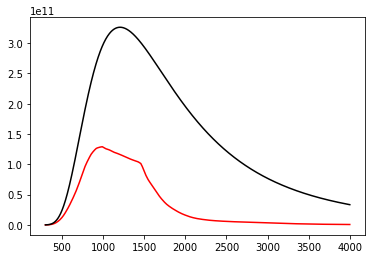

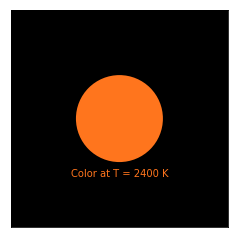

1

In [5]:
w_slab.thermal_color()

### Coated Structure
We can see how applying a coating to the tungsten can change its properties by defining a new structure called 'coated_w' as follows:

In [6]:
structure["Material_List"] = ['Air', 'SiO2', 'W', 'Air']
structure["Thickness_List"] = [0, 50e-9, 900e-9, 0]
coated_w = multilayer(structure)

Now we can compare the thermal emission of the coated W structure to the w slab structure as follows:

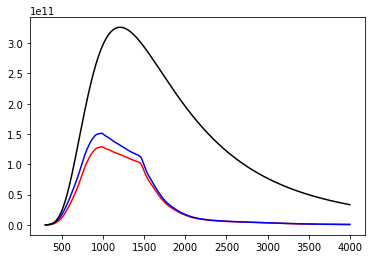

In [7]:


### Plot Thermal Emission of bare W slab with a red line
plt.plot(w_slab.lambda_array*1e9, w_slab.thermal_emission_array, 'red')
### Plot Thermal Emission of coated W with a blue line
plt.plot(coated_w.lambda_array*1e9, coated_w.thermal_emission_array, 'blue')
### Plot blackbody spectrum with a black line
plt.plot(w_slab.lambda_array*1e9, w_slab.BBs, 'black')
plt.show()


We can compare the luminous efficiency of the two structures as follows:

In [9]:
print(" Efficiency of bare W is ",100*w_slab.luminous_efficiency_val, "%")
print(" Efficiency of coated W is ",100*coated_w.luminous_efficiency_val, "%")

 Efficiency of bare W is  2.248386310378663 %
 Efficiency of coated W is  2.6501065540679924 %


We can also see how changing the thickness of the glass coating impacts the efficiency.  In particular, we will loop through different coatings thicknesses and store the results in an array called 'eta_vs_d'. 

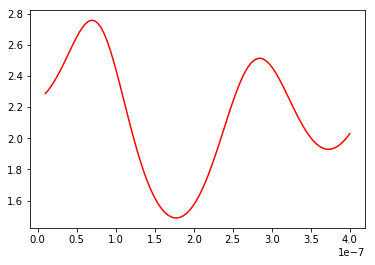

In [12]:
### method to compute reflectivity, transmissivity, and absorptivity vs angle at a specified
### wavelength... results are stored in the attributes
### self.r_vs_theta, self.t_vs_theta, and self.eps_vs_theta... array of angles is self.theta_array
import numpy as np
eta_vs_d = np.zeros(100)
d_array = np.linspace(10e-9,400e-9,100)
i = 0
for dsio2 in d_array:
    coated_w.d[1] = dsio2
    coated_w.fresnel()
    coated_w.thermal_emission()
    coated_w.luminous_efficiency()
    eta_vs_d[i] = coated_w.luminous_efficiency_val*100
    i = i + 1

plt.plot(d_array, eta_vs_d, 'red')
plt.show()
